# Ejercicio Práctico con Pandas

## Objetivo: Explorar y analizar el conjunto de datos de pesos y alturas.
### Parte 1: Exploración Básica del DataFrame

    Cargar el archivo CSV en un DataFrame de Pandas.
    Explorar el DataFrame:
        Mostrar las primeras y últimas 5 filas del DataFrame.
        Obtener información general del DataFrame, como el número de filas, columnas y tipos de datos.
        Calcular estadísticas descriptivas básicas para las columnas numéricas (media, mediana, desviación estándar, mínimos y máximos).

### Parte 2: Limpieza y Preparación de Datos

    Convertir la altura de pulgadas a centímetros.
    Convertir el peso de libras a kilogramos.
    Tratar con valores faltantes (si los hay): Identificar y manejar los valores faltantes en el conjunto de datos.

#### Parte 3: Análisis Exploratorio de Datos

    Agrupar datos por género y calcular el peso medio para cada género.
    Visualización:
        Crear histogramas de las distribuciones de altura y peso.
        Crear un diagrama de caja (boxplot) para comparar la distribución del peso entre géneros.
    Filtrar datos para un rango de altura específico y calcular estadísticas descriptivas.

### Parte 4: Operaciones Avanzadas

    Calcular los percentiles del peso para cada género.
    Crear una nueva columna que clasifique a los individuos como 'Bajo Peso', 'Peso Normal', 'Sobrepeso' o 'Obesidad' basado en su IMC (Índice de Masa Corporal).

### Parte 5: Exportar Resultados

    Guardar los resultados del análisis en un nuevo archivo CSV.

In [1]:
import pandas as pd
URL = "https://drive.google.com/uc?export=download&id=1-zKKm5aEEabJS01n4vZhE8iiacnXYWGg"
df = pd.read_csv(URL)
print(df.head(15).to_string(index=False))

Gender    Height     Weight
  Male 73.847017 241.893563
  Male 68.781904 162.310473
  Male 74.110105 212.740856
  Male 71.730978 220.042470
  Male 69.881796 206.349801
  Male 67.253016 152.212156
  Male 68.785081 183.927889
  Male 68.348516 167.971110
  Male 67.018950 175.929440
  Male 63.456494 156.399676
  Male 71.195382 186.604926
  Male 71.640805 213.741169
  Male 64.766329 167.127461
  Male 69.283070 189.446181
  Male 69.243732 186.434168


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  9998 non-null   float64
 2   Weight  9998 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
df.describe()

,Height,Weight
count,9998.000000,9998.000000
mean,66.366788,161.434302
std,3.847510,32.108770
min,54.263133,64.700127
25%,63.505073,135.815966
50%,66.317827,161.197662
75%,69.170292,187.139777
max,78.998742,269.989699


In [9]:
df['altura_cm'] = df['Height']*2.54
df['peso_kg']=df['Weight']*0.4535
df = df.drop(['Height','Weight'],axis=1)
df

,Gender,altura_cm,peso_kg
0,Male,187.571423,109.698731
1,Male,174.706036,73.607799
2,Male,188.239668,96.477978
3,Male,182.196685,99.789260
4,Male,177.499761,93.579635
...,...,...,...
9995,Female,168.078536,62.028575
9996,Female,170.350573,77.488595
9997,Female,162.224700,58.263557
9998,Female,175.346978,74.307091


In [11]:
df.describe()

,altura_cm,peso_kg
count,9998.000000,9998.000000
mean,168.571641,73.210456
std,9.772676,14.561327
min,137.828359,29.341507
25%,161.302884,61.592541
50%,168.447282,73.103140
75%,175.692542,84.867889
max,200.656806,122.440328


In [10]:
df.isnull().sum()


Gender       0
altura_cm    2
peso_kg      2
dtype: int64

In [ ]:
filtro = df.isnull().any(axis=1)
df[filtro]

In [12]:
df['altura_cm'].fillna(df['altura_cm'].mean(), inplace=True)
df['peso_kg'].fillna(df['peso_kg'].mean(), inplace=True)
df.isnull().sum()

Gender       0
altura_cm    0
peso_kg      0
dtype: int64

In [13]:
percentiles= df.groupby('Gender')['peso_kg'].quantile([0.25,0.5,0.75])
percentiles

Gender      
Female  0.25    55.750613
        0.50    61.729324
        0.75    67.485755
Male    0.25    78.849571
        0.50    84.815894
        0.75    90.862263
Name: peso_kg, dtype: float64

In [15]:
def imc(peso, altura):
  imc = peso / (altura/100)**2
  if imc < 18.5:
    return 'bajo peso'
  elif 18.5 <= imc < 25:
    return 'peso normal'
  elif 25 <= imc < 30:
    return 'sobrepeso'
  else:
    return 'obesidad'

In [16]:
df['imc']= df.apply(lambda row: imc(row['peso_kg'], row['altura_cm']), axis=1)
df

,Gender,altura_cm,peso_kg,imc
0,Male,187.571423,109.698731,obesidad
1,Male,174.706036,73.607799,peso normal
2,Male,188.239668,96.477978,sobrepeso
3,Male,182.196685,99.789260,obesidad
4,Male,177.499761,93.579635,sobrepeso
...,...,...,...,...
9995,Female,168.078536,62.028575,peso normal
9996,Female,170.350573,77.488595,sobrepeso
9997,Female,162.224700,58.263557,peso normal
9998,Female,175.346978,74.307091,peso normal


In [19]:
import matplotlib.pyplot as plt

peso_medio_genero = df.groupby('Gender')['peso_kg'].mean()
peso_medio_genero

Gender
Female    61.612552
Male      84.808360
Name: peso_kg, dtype: float64

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

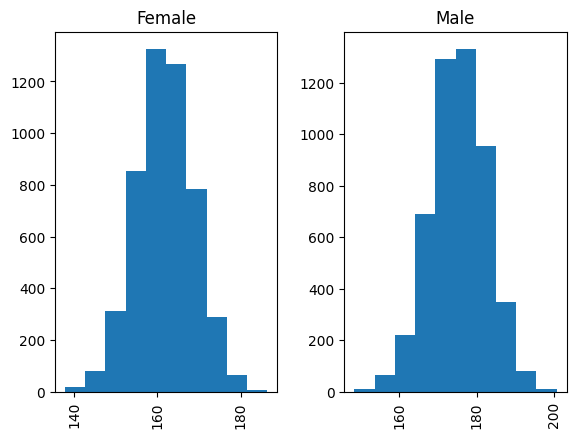

In [20]:
df['altura_cm'].hist(by=df['Gender'])

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

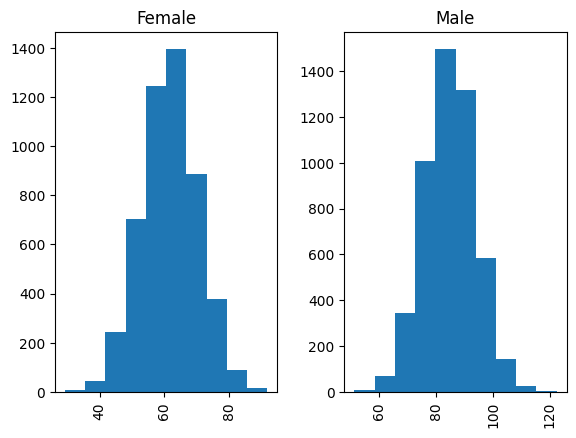

In [21]:
df['peso_kg'].hist(by=df['Gender'])

<Axes: title={'center': 'peso_kg'}, xlabel='Gender'>

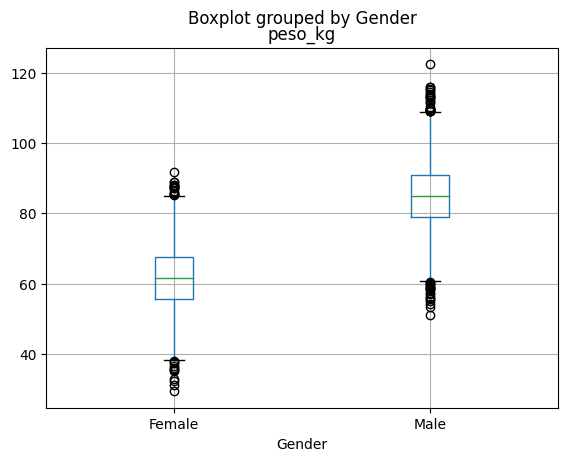

In [22]:
df.boxplot(column='peso_kg', by='Gender')

In [24]:
rangoinf = 170
rangosup = 190

filtro_altura = df[(df['altura_cm'] >= rangoinf) & (df['altura_cm'] <= rangosup)]
filtro_altura.describe()

,altura_cm,peso_kg
count,4366.000000,4366.000000
mean,177.160209,85.561239
std,4.875151,8.061071
min,170.008925,59.735255
25%,173.077767,80.152928
50%,176.384809,85.691661
75%,180.654738,91.220156
max,189.980253,113.350639


In [31]:
from google.colab import userdata
import requests
df = pd.DataFrame(columns=['Title', 'Year', 'Rated'])

In [28]:
url_omdb = "https://www.omdbapi.com/?apikey=" + \
    userdata.get("OMDB_API") + "&t="

In [36]:
def add_movie(movie):
    """
    Devuelve la ruta al poster en jpg

    Args:
        imdbId (str): El identificador IBMDB de la película
    """
    result = requests.get(url_omdb + movie)
    result_json = result.json()
    temp_df = pd.DataFrame([result_json])
    global df
    df = pd.concat([df, temp_df], ignore_index = True)
    return result_json

In [39]:
lista = list(['Avatar','Godzilla','Spiderman', 'Thor'])
for peli in lista:

  add_movie(peli)

df

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
0,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",A paraplegic Marine dispatched to the moon Pan...,...,7.9,"1,384,939",tt0499549,movie,10 Feb 2016,"$785,221,649",N/A,N/A,True,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Movie not found!
2,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",A paraplegic Marine dispatched to the moon Pan...,...,7.9,"1,384,939",tt0499549,movie,10 Feb 2016,"$785,221,649",N/A,N/A,True,NaN
3,Godzilla,2014,PG-13,16 May 2014,123 min,"Action, Adventure, Sci-Fi",Gareth Edwards,"Dave Callaham, Max Borenstein","Aaron Taylor-Johnson, Elizabeth Olsen, Bryan C...",The world is beset by the appearance of monstr...,...,6.4,"437,047",tt0831387,movie,26 Aug 2014,"$200,676,069",N/A,N/A,True,NaN
4,Spiderman,1990,N/A,N/A,5 min,Short,Christian Davi,N/A,N/A,N/A,...,5.6,96,tt0100669,movie,N/A,N/A,N/A,N/A,True,NaN
5,Thor,2011,PG-13,06 May 2011,115 min,"Action, Fantasy",Kenneth Branagh,"Ashley Miller, Zack Stentz, Don Payne","Chris Hemsworth, Anthony Hopkins, Natalie Portman",The powerful but arrogant god Thor is cast out...,...,7.0,"896,830",tt0800369,movie,01 Jul 2013,"$181,030,624",N/A,N/A,True,NaN


In [40]:
df.describe()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error
count,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,6,1
unique,4,4,2,4,4,4,4,4,4,4,...,4,4,4,1,4,4,1,1,2,1
top,Avatar,2009,PG-13,18 Dec 2009,162 min,"Action, Adventure, Fantasy",James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver",A paraplegic Marine dispatched to the moon Pan...,...,7.9,"1,384,939",tt0499549,movie,10 Feb 2016,"$785,221,649",N/A,N/A,True,Movie not found!
freq,2,2,4,2,2,2,2,2,2,2,...,2,2,2,5,2,2,5,5,5,1
